In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

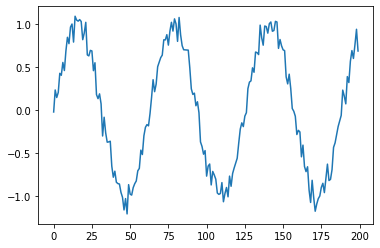

In [2]:
ser = np.sin(0.1*np.arange(200)) +  np.random.randn(200)*0.1
plt.plot(ser)

In [ ]:
len(ser)


200

In [7]:
T = 10
X = []
Y = []
D = 1

for t in range(len(ser)-T):
  x = ser[t:t+T]
  X.append(x)
  y = ser[t+T]
  Y.append(y)



In [8]:
X = np.array(X).reshape(-1,T,1)
Y = np.array(Y)
N = len(X)
N

190

In [9]:
i = Input(shape=(T,1))
x = SimpleRNN(5,activation='relu')(i)
x = Dense(1)(x)
model = Model(i,x)
model.compile(loss='mse',optimizer=Adam(lr=0.1))

r = model.fit(X[:-N//2],Y[:-N//2],validation_data=(X[-N//2:],Y[-N//2:]),epochs=80,steps_per_epoch=95)

Epoch 1/80


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


95/95 [==============================] - 1s 5ms/step - loss: 0.1117 - val_loss: 0.0527
Epoch 2/80
95/95 [==============================] - 0s 3ms/step - loss: 0.1266 - val_loss: 0.0811
Epoch 3/80
95/95 [==============================] - 0s 3ms/step - loss: 0.0540 - val_loss: 0.0366
Epoch 4/80
95/95 [==============================] - 0s 3ms/step - loss: 0.0640 - val_loss: 0.0243
Epoch 5/80
95/95 [==============================] - 0s 3ms/step - loss: 0.0513 - val_loss: 0.0271
Epoch 6/80
95/95 [==============================] - 0s 3ms/step - loss: 0.0515 - val_loss: 0.0347
Epoch 7/80
95/95 [==============================] - 0s 3ms/step - loss: 0.0555 - val_loss: 0.0498
Epoch 8/80
95/95 [==============================] - 0s 3ms/step - loss: 0.0856 - val_loss: 0.0682
Epoch 9/80
95/95 [==============================] - 0s 2ms/step - loss: 0.0690 - val_loss: 0.0380
Epoch 10/80
95/95 [==============================] - 0s 3ms/step - loss: 0.0761 - val_loss: 0.0363
Epoch 11/80
95/95 [===========

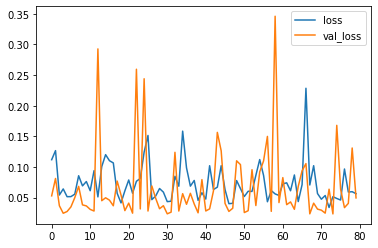

In [10]:
plt.plot(r.history['loss'],label = 'loss')
plt.plot(r.history['val_loss'],label = 'val_loss')
plt.legend()

In [ ]:
validation_target = Y[-N//2:]
val_pred = []
last_x = X[-N//2]
while len(val_pred) < len(validation_target):
  p = model.predict(last_x.reshape(1,-1))[0,0]
  val_pred.append(p)
  last_x = np.roll(last_x,-1)
  last_x[-1] = p
  



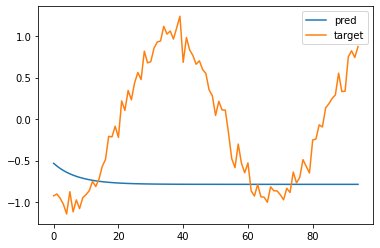

In [ ]:
plt.plot(val_pred,label = 'pred')
plt.plot(validation_target,label='target')
plt.legend();